In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [33]:
df = pd.read_csv("companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


<AxesSubplot:>

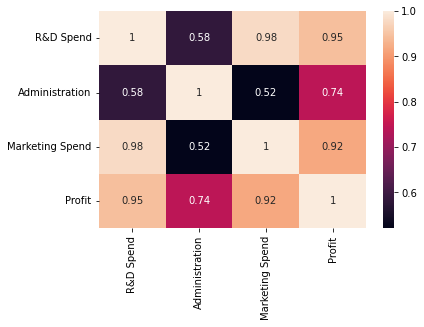

In [36]:
sns.heatmap(df.corr(), annot=True)

In [37]:
df.State.describe()

count           1000
unique             3
top       California
freq             344
Name: State, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [39]:
le = LabelEncoder()

In [40]:
df["State"] = le.fit_transform(df["State"])
df.head()

# df.drop("Marketing Spend", inplace=True, axis=1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [41]:
col_trsanformer = ColumnTransformer([("encoder", OneHotEncoder(), [3])], remainder="passthrough")
#                                                                 ^ column      

In [42]:
data = np.array(col_trsanformer.fit_transform(df), dtype=np.float64)
# data.itemsize

pd.DataFrame(data).describe()

,0,1,2,3,4,5,6
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.344000,0.322000,0.334000,81668.927200,122963.897612,226205.058419,119546.164656
std,0.475279,0.467477,0.471876,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,0.000000,0.000000,0.000000,51283.140000,0.000000,14681.400000
25%,0.000000,0.000000,0.000000,43084.500000,116640.684850,150969.584600,85943.198543
50%,0.000000,0.000000,0.000000,79936.000000,122421.612150,224517.887350,117641.466300
75%,1.000000,1.000000,1.000000,124565.500000,129139.118000,308189.808525,155577.107425
max,1.000000,1.000000,1.000000,165349.200000,321652.140000,471784.100000,476485.430000


In [43]:
X = data[:, :-1] # rows and except last col all column
y = data[:, -1]

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("Coefficient", lin_reg.coef_)
print("Intercept", lin_reg.intercept_)

Coefficient [ 4.46921768e+02 -3.42694235e+02 -1.04227533e+02  5.26047095e-01
  9.78530820e-01  9.80946128e-02]
Intercept -66123.76082363771


In [46]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9311120236268366